## Final Project Submission

* Student name: Michael Cheng
* Student pace: self paced
* Scheduled project review date/time: 9/11/2019 15:00 PT
* Instructor name: Eli Thomas
* Blog post URL: https://cytmike.github.io/the_choice_of_variables_in_a_data_science_project


## Abstract
In this project, the King County House Sales dataset is examined. It includes homes sold between May 2014 and May 2015. The goal is to build a multivariate linear regression model to predict the sale price of houses. 

## 1 Introduction



King County is the most populous county in Washington state, with an estimated population of over 2.2 million in 2018. Seattle is the biggest city in King county. About one-third of King County's population (about 750000) lives in Seattle and the rest in Seattle's suburbs.

The Data Science OSEMiN process is used in this project. It has the following 5 steps:
* Obtain
* Scrub
* Explore
* Model
* INterpret

Obtain: This stage involves understanding requirements, gathering information on the problem and sourcing the data.

Scrub: This step is to preprocess the data, which includes identifying and removing null values.

Explore: Create various visualizations to get a feeling of the data set.

Model: Building and tuning the model, in order to solve the problem.

Interpret: Interpret the results generated by the model and communicate to others. If needed, repeat the steps above.

## 2 Obtaining the Data

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data into dataframe and check first 5 rows
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


The data contains 21597 entries, and there are 21 variables.

The meaning of each of the variables is as follows:
* id - a notation for a house
* date - Date house was sold
* price - Price is prediction target
* bedrooms - Number of Bedrooms/House
* bathrooms - Number of bathrooms/House
* sqft_living - square footage of the home
* sqft_lot - square footage of the lot
* floors - Total floors (levels) in house
* waterfront - House which has a view to a waterfront
* view - Has been viewed
* condition - How good the condition is ( Overall )
* grade - overall grade given to the housing unit, based on King County grading system
* sqft_above - square footage of house apart from basement
* sqft_basement - square footage of the basement
* yr_built - Built Year
* yr_renovated - Year when house was renovated
* zipcode - zip
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
* sqft_lot15 - lotSize area in 2015(implies-- some renovations)

## 3 Scrubbing and Cleaning Data
### 3.1 Missing Values

From the summary above, there are 3 variables with less than 21597 entries: waterfront, view and yr_renovated. It means there are missing data. Each of them will be examined below.

In [4]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [5]:
df.waterfront.isna().sum()

2376

This shows that waterfront is a boolean value. The house is next to waterfront if the variable value is 1. Out of the 19221 non-null entries, only 0.76% of houses are waterfront. It is reasonable to adjust all the null values to 0.

In [6]:
df.waterfront.fillna(0, inplace = True)
df.waterfront.isna().sum()

0

view is the next variable to be considered.

In [7]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [8]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [9]:
df.view.isna().sum()

63

view has 5 different values: 0, 1, 2, 3, or 4. 19422 of the 21534 non-null entries are 0, which is 90.19%. It means that most houses have 0 views. It is reasonable to fill all null values with 0.

In [10]:
df.view.fillna(0, inplace = True)
df.view.isna().sum()

0

The last one with missing data is yr_renovated.

In [11]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [12]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Again, 0 is the most common value for yr_renovated, with 17011 or 95.81% of them. The most likely explanation is that the house is never renovated after it is built. Hence the null values can be filled with 0.

In [16]:
df.yr_renovated.fillna(0, inplace = True)
df.yr_renovated.isna().sum()

0

Convert yr_revonated from float64 to int64 for consistency.

In [17]:
df.yr_renovated = df.yr_renovated.astype('int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 3.5+ MB


Now every column has 21597 entries, which means there are no missing data.

### 3.2 Data Types
sqft_basement is object type, while sqft_living, sqft_lot and sqft_above are int64 type. sqft_basement should be converted to int64 as well.

In [19]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [17]:
df[df.sqft_basement=='?'].sqft_basement.count()

454

In [20]:
df[df.sqft_basement=='0.0'].sqft_basement.count()

12826

There is a '?' in sqft_basement in 454 entries, and it is the reason that sqft_basement is imported as a string type instead of integer. Since it is unknown if there is a basement, the size can be modified to 0. 0 is also the most common value.

In [21]:
df.loc[df.sqft_basement=='?','sqft_basement'] = '0.0'
df[df.sqft_basement=='?'].sqft_basement.count()

0

Convert the column to float64 type.

In [22]:
df.sqft_basement = df.sqft_basement.astype('float64')
df.sqft_basement.dtypes

dtype('float64')

date column can be converted to datetime type.

In [23]:
df.date = pd.to_datetime(df.date)

id is a column that is not related to our analysis, so it can be dropped.

In [24]:
df = df.drop(['id'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11)
memory usage: 3.3 MB


There are no missing data, and all columns are of correct types.

## 4 Exploring the Data

The following 3 questions will be answered in the exploration step:
* Which month or season is the best to sell a house?
* How does location affect the price of a house?
* How does the age of a house affect its price?

date is the first column to be explored.

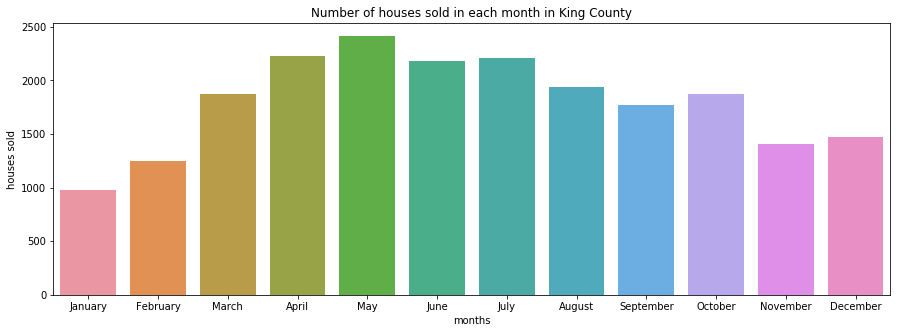

In [25]:
#for month names
import calendar
plt.figure(figsize=(15,5))
total = []
for i in range(1,13):
    total.append(sum(df.date.dt.month == i))
ax = sns.barplot(calendar.month_name[1:13], total)
ax.set(xlabel = 'months', ylabel = 'houses sold', title = 'Number of houses sold in each month in King County');

It shows that April to July are the 4 months with most sales, with over 2000 each. On the other hand, January and Februray have the least sales.

date should be treated as categorical variable in the model.

Next variable to look at is price, which is the target variable.

Most of the houses are below 1 million.

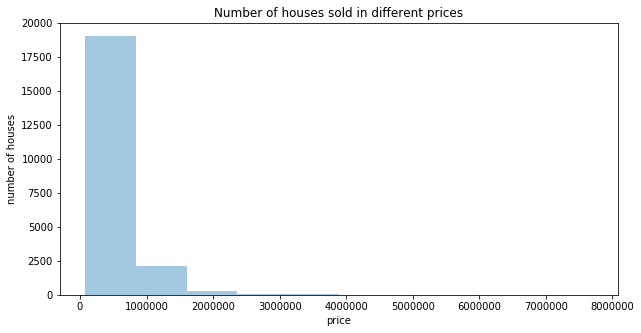

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(df.price, bins=10, kde=False)
plt.ylabel('number of houses')
plt.title('Number of houses sold in different prices')
plt.show()

In [25]:
print('Mean: ', df.price.mean())
print('Median: ', df.price.median())

Mean:  540296.5735055795
Median:  450000.0


The mean housing price is about 540000, and the median is 450000.
These numbers can be used for comparison in the following questions.

#### Question 1: Which month or season is the best to sell a house?

The following plot and table shows the average price in each month.

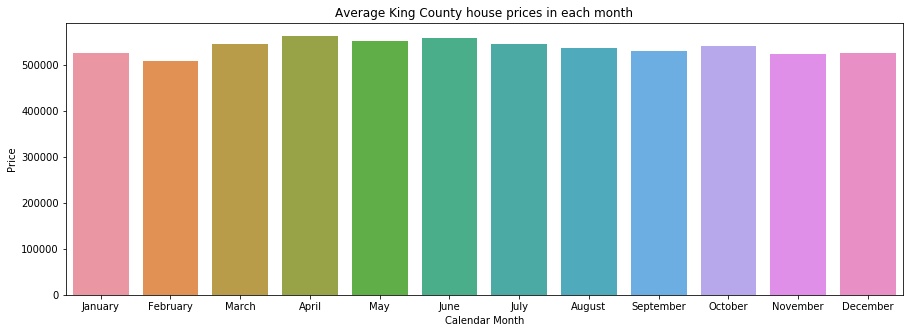

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(df.date.dt.month, df.price, ci=None)
plt.xlabel('Calendar Month')
plt.ylabel('Price')
plt.title('Average King County house prices in each month')
plt.xticks(range(0,12), calendar.month_name[1:13])
plt.show()

In [28]:
for i in range(1,13):
    print(calendar.month_name[i],df[df.date.dt.month==i].price.mean())

January 525963.2515337423
February 508520.0513231756
March 544057.6832
April 562215.6150740242
May 550849.7468931235
June 557534.3181818182
July 544892.1610131162
August 536655.2124806602
September 529723.5177865613
October 539439.447228145
November 522359.90347764373
December 524799.9020408164


The price is lowest in Februrary, and highest in April. However, the difference is only about 10.56%. Unlike the number of houses sold in each month, the difference in price is minimal.

It does not help a lot by waiting months to sell a home in peak season.

#### Question 2: How does location affect the price of a house?

The following plot shows the house prices grouped by zip code.


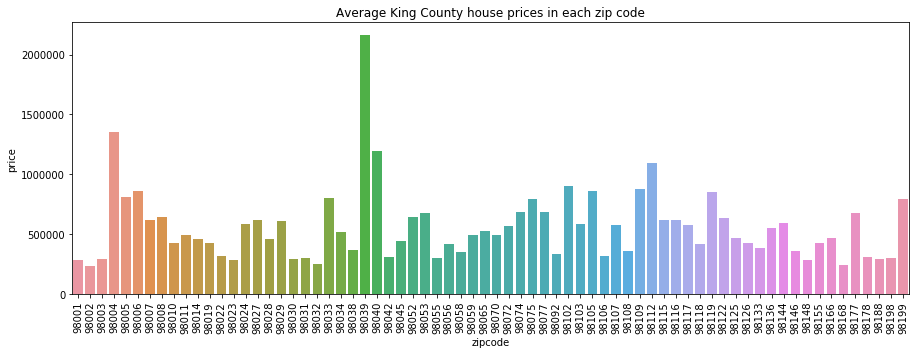

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(df.zipcode, df.price, ci=None)
# rotate the zip codes for them to be visible
plt.xticks(rotation=90)
plt.title('Average King County house prices in each zip code')
plt.show()

The 3 zip codes with the most expensive homes are 98039, 98004 and 98040. They are all adjacent to each other, and close to Lake Washington.

98039 is Medina, 98004 is downtown Bellevue, and 98040 is Mercer Island.

The next plot is based on latitude and longitude, so it is close to a real map.

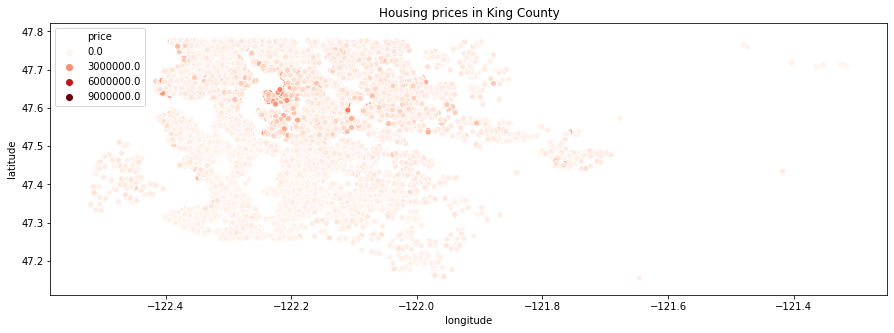

In [30]:
plt.figure(figsize=(15,5))
sns.scatterplot(df.long, df.lat, hue=df.price, palette='Reds');
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Housing prices in King County');

The darker the color, the more expensive the house is. To remove the outliers, here is a plot with only houses with prices below 2 million.

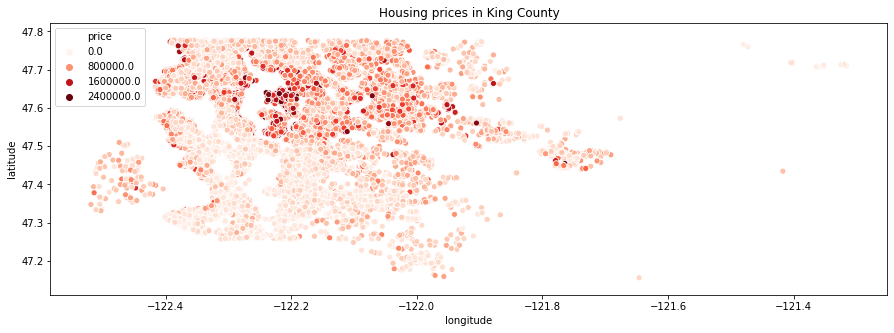

In [31]:
plt.figure(figsize=(15,5))
sns.scatterplot(df.long, df.lat, hue=df[df.price<2000000].price, palette='Reds');
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Housing prices in King County');

Most of the expensive homes are around Lake Washington.

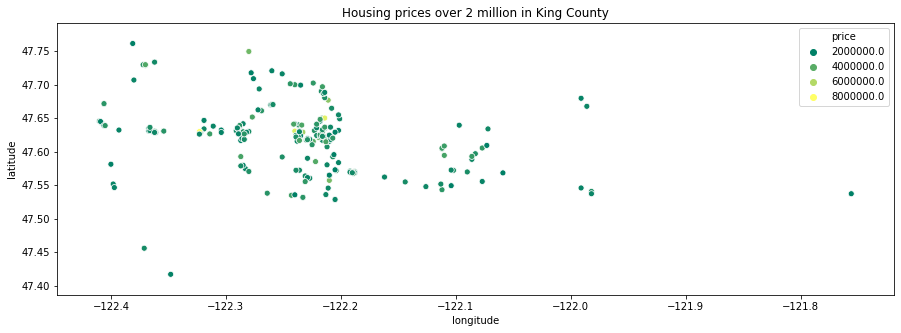

In [32]:
plt.figure(figsize=(15,5))
sns.scatterplot(df.long, df.lat, hue=df[df.price>=2000000].price, palette='summer');

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Housing prices over 2 million in King County');

It shows that the location or zip code greatly affects the price of a home in King County. A seller should definitely consult the prices of nearby homes when listing.

#### Question 3: How does the age of a house affect its price?



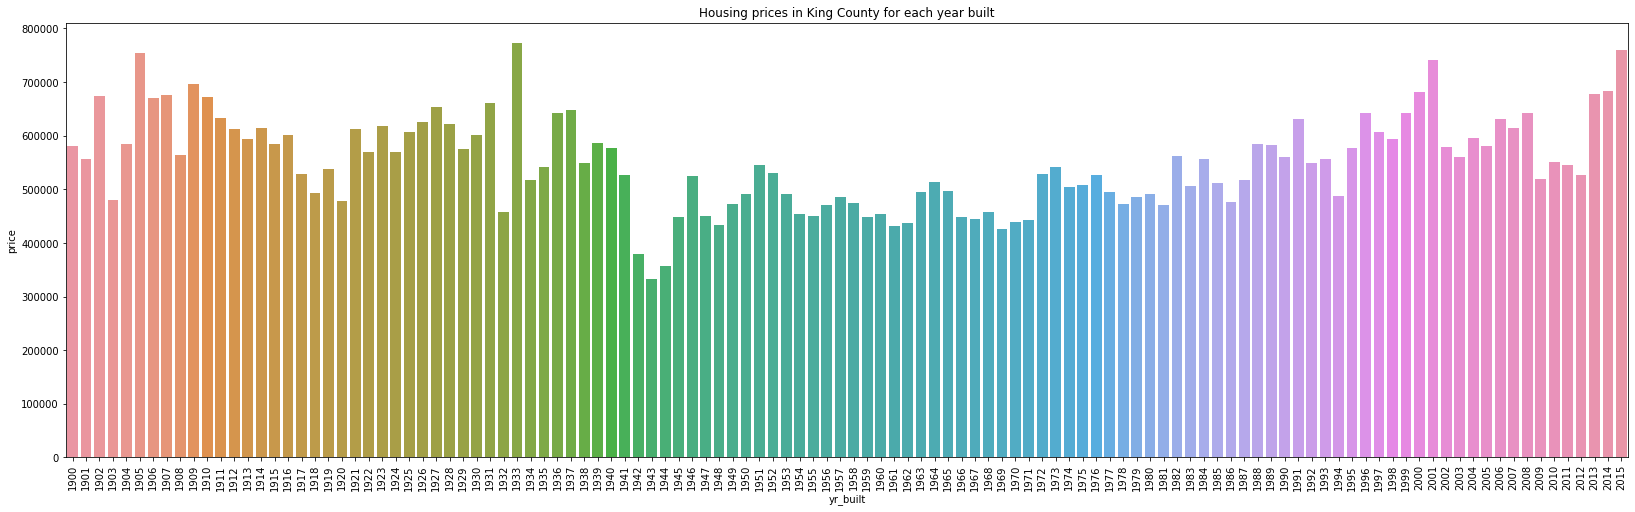

In [33]:
plt.figure(figsize=(28,8))
sns.barplot(df.yr_built, df.price, ci=None)
# rotate the years for them to be visible
plt.xticks(rotation=90);
plt.title('Housing prices in King County for each year built');

This graph shows the average price for houses built in each year, from 1900 to 2015.

There is no significant trend that can be observed, even houses built over 100 years ago have similar prices.

## 5 Modeling

The first step in modeling is to check for multicollinearity. This is because regression assumes the variables are unrelated to each other.

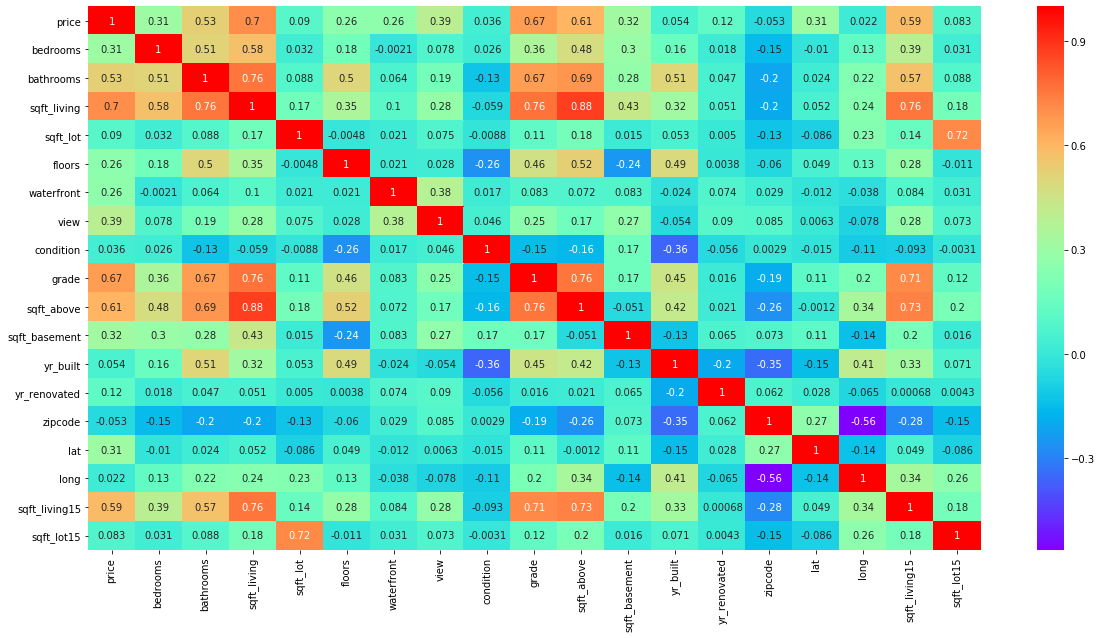

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap = 'rainbow', annot = True);

sqft_living, bathrooms, sqft_living15 and sqft_above are highly correlated, so it is reasonable to remove some of them.
In this model, sqft_living15 and sqft_living are removed. sqft_above and bathrooms are retained because they are more intuitive to understand.

In [35]:
df.drop('sqft_living', axis=1, inplace=True)

In [36]:
df.drop('sqft_living15', axis=1, inplace=True)

Next step is to check for linearity. If a variable does not have a linear relationship with price, it cannot forecast price in regression. Such variables should be dropped.

One such example would be zipcode. An increase of decrease in zipcode have no relationship with the price.

The correlation of each variable with price is calculated below.

In [37]:
df.corr()['price'].sort_values()

zipcode         -0.053402
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.117855
floors           0.256804
waterfront       0.264306
lat              0.306692
bedrooms         0.308787
sqft_basement    0.321108
view             0.393497
bathrooms        0.525906
sqft_above       0.605368
grade            0.667951
price            1.000000
Name: price, dtype: float64

The higher the correlation, the more useful it is to predict price. As expected, zipcode has the lowest correlation, even less than 0. It is because zipcode should be a categorical variable instead.

view and condition are also categorical variable, because they are discrete values from 0 to 5.

long, yr_built, sqft_lot15, and sqft_lot are dropped because of low correlation to price.

In [38]:
df.drop(['long','yr_built','sqft_lot15','sqft_lot'], axis=1, inplace=True)

In [39]:
# drop date column
df.drop('date', axis=1, inplace=True)

yr_renovated is an interesting one, because the year itself has very little meaning. However it is useful to know if a house is renovated or not.

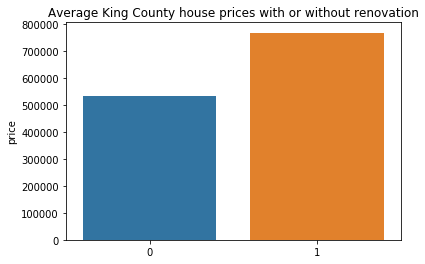

In [40]:
renovated=[]
for i in df.yr_renovated:
    if i>0:
        renovated.append(1)
    else:
        renovated.append(0)
sns.barplot(renovated, df.price, ci=None)
plt.title('Average King County house prices with or without renovation')
plt.show()

From this, it shows that renovation increases the home price. The model will drop yr_renovated and use renovated instead.

In [41]:
renovated = pd.DataFrame(renovated)
renovated.columns = ['renovated']
df = pd.concat([df, renovated], axis=1)

In [42]:
# drop yr_renovated column
df.drop('yr_renovated', axis=1, inplace=True)

Next step is to one-hot encode dummy variables for zipcode, view, floor and condition.

In [43]:
zipcode_dummies = pd.get_dummies(df.zipcode, prefix="zipcode", drop_first=True)
view_dummies = pd.get_dummies(df.view, prefix="view", drop_first=True)
condition_dummies = pd.get_dummies(df.condition, prefix="condition", drop_first=True)
floor_dummies = pd.get_dummies(df.floors, prefix="floors", drop_first=True)

In [44]:
# drop these 4 categorical columns
df.drop(['zipcode','view','condition','floors'], axis=1, inplace=True)

In [45]:
# drop price and put it on its own
price = df.price

df.drop(['price'], axis=1, inplace=True)

Here are the numerical variables that are included in the regression model.

In [46]:
df.columns

Index(['bedrooms', 'bathrooms', 'waterfront', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'renovated'],
      dtype='object')

Finally, attach the dummy variables.

In [47]:
df = pd.concat([df, zipcode_dummies, view_dummies, condition_dummies, floor_dummies], axis=1)
df.head()

,bedrooms,bathrooms,waterfront,grade,sqft_above,sqft_basement,lat,renovated,zipcode_98002,zipcode_98003,...,view_4.0,condition_2,condition_3,condition_4,condition_5,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,3,1.00,0.0,7,1180,0.0,47.5112,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3,2.25,0.0,7,2170,400.0,47.7210,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,2,1.00,0.0,6,770,0.0,47.7379,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,0.0,7,1050,910.0,47.5208,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3,2.00,0.0,8,1680,0.0,47.6168,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
df.columns

Index(['bedrooms', 'bathrooms', 'waterfront', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'renovated', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zip

These 90 columns are going to be included in the regression model.

Out of these 90, 6 of them are numerical: bedrooms, bathrooms, grade, sqft_above, sqft_basement and lat.

2 of them are boolean, that has 0 or 1 value, waterfront and renovated.

The rest are categorical variables, converted from zipcode, view, floors and condition.

The regression model is going to compute the price of any given house using these variables.

#### Train Test Split
The data set is split into 2 parts, with 75% for training and 25% for testing.

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, price, test_size=0.25)

In [50]:
# check the train and test size
print(len(x_train),len(x_test),len(y_train),len(y_test))

16197 5400 16197 5400


#### Using statsmodels

In [51]:
import statsmodels.api as sm
predictors_int = sm.add_constant(df)
model = sm.OLS(price, predictors_int).fit()
model.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1007.
Date:                Tue, 03 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:49:19   Log-Likelihood:            -2.8956e+05
No. Observations:               21597   AIC:                         5.793e+05
Df Residuals:                   21506   BIC:                         5.800e+05
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.008e+07      3e+06     -3.355      0.001    -1.6e+07   -4.19e+06
bedrooms      -2.581e+04   1543.388    -16.724      0.000   -2.88e+04   -2.28e+04
bathrooms       1.78e+04   2515.196      7.078      0.000    1.29e+04    2.27e+04
waterfront     5.977e+05   1.66e+04     35.987      0.000    5.65e+05     6.3e+05
grade          5.582e+04   1713.905     32.571      0.000    5.25e+04    5.92e+04
sqft_above      218.8890      2.773     78.945      0.000     213.454     224.324
sqft_basement   129.9904      3.459     37.585      0.000     123.211     136.769
lat            2.025e+05   6.35e+04      3.189      0.001     7.8e+04    3.27e+05
renovated      5.543e+04   6152.995      9.008      0.000    4.34e+04    6.75e+04
zipcode_98002  2.819e+04   1.43e+04      1.975      0.048     215.535    5.62e+04
zipcode_98003 -1.257e+04   1.29e+04     -0.977      0.329   -3.78e+04    1.26e+04
zipcode_98004  7.221e+05   2.32e+04     31.161      0.000    6.77e+05    7.68e+05
zipcode_98005  2.476e+05   2.45e+04     10.124      0.000       2e+05    2.96e+05
zipcode_98006  2.232e+05   1.94e+04     11.483      0.000    1.85e+05    2.61e+05
zipcode_98007  1.914e+05    2.5e+04      7.659      0.000    1.42e+05     2.4e+05
zipcode_98008  1.906e+05   2.32e+04      8.209      0.000    1.45e+05    2.36e+05
zipcode_98010  6.472e+04   1.83e+04      3.534      0.000    2.88e+04    1.01e+05
zipcode_98011  3.642e+04   3.17e+04      1.148      0.251   -2.58e+04    9.86e+04
zipcode_98014  3.906e+04   2.85e+04      1.371      0.170   -1.68e+04    9.49e+04
zipcode_98019  9255.8825   3.08e+04      0.301      0.764   -5.11e+04    6.96e+04
zipcode_98022  1.494e+04    1.5e+04      0.998      0.318   -1.44e+04    4.43e+04
zipcode_98023 -3.144e+04   1.12e+04     -2.817      0.005   -5.33e+04   -9565.000
zipcode_98024  1.233e+05   2.55e+04      4.838      0.000    7.33e+04    1.73e+05
zipcode_98027  1.315e+05   1.79e+04      7.365      0.000    9.65e+04    1.66e+05
zipcode_98028  3.663e+04   3.11e+04      1.179      0.238   -2.43e+04    9.75e+04
zipcode_98029  1.652e+05   2.02e+04      8.172      0.000    1.26e+05    2.05e+05
zipcode_98030 -5608.6664   1.37e+04     -0.409      0.683   -3.25e+04    2.13e+04
zipcode_98031  -103.6209   1.43e+04     -0.007      0.994   -2.81e+04    2.79e+04
zipcode_98032 -3594.7975   1.73e+04     -0.208      0.835   -3.74e+04    3.02e+04
zipcode_98033  2.948e+05   2.62e+04     11.240      0.000    2.43e+05    3.46e+05
zipcode_98034  1.211e+05   2.83e+04      4.274      0.000    6.55e+04    1.77e+05
zipcode_98038  2.178e+04   1.15e+04      1.893      0.058    -771.702    4.43e+04
zipcode_98039  1.261e+06   3.17e+04     39.757      0.000     1.2e+06    1.32e+06
zipcode_98040  4.729e+05   2.06e+04     22.957      0.000    4.33e+05    5.13e+05
zipcode_98042 -7578.0087   1.15e+04     -0.658   

Using statsmodels, the R-squared is 0.808, which is a great value. It means that this model can predict housing price with 80.7% accuracy.

#### Using scikit learn

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_hat_test = linreg.predict(x_test)
y_hat_train = linreg.predict(x_train)
r2_score(y_test,y_hat_test)

0.8051662787334873

The R-squared for test set is 0.805, which is almost same as above.

In [53]:
r2_score(y_train,y_hat_train)

0.8085505449431204

The R-squared score for train set is very close, it means the model generalize from train to test well.

The last step is to check for the p-values, any predictors with p-values greater than 0.05 should not be included.

All of the numerical variables are good, view is also good. However some of the zipcode and condition dummy variable have large p-values. That means they are statiscally insignificant and should be removed from the model.

In [54]:
# add all statiscally significant features to the list
significant = []
for i in df.columns:
    if model.pvalues[i] < 0.05:
        significant.append(i)
len(significant)

69

Now there are 69 variables remaining, the regression can be performed again.

In [55]:
predictors_int = sm.add_constant(df[significant])
model = sm.OLS(price, predictors_int).fit()
model.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1312.
Date:                Tue, 03 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:50:36   Log-Likelihood:            -2.8958e+05
No. Observations:               21597   AIC:                         5.793e+05
Df Residuals:                   21527   BIC:                         5.799e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.327e+07   6.82e+05    -19.462      0.000   -1.46e+07   -1.19e+07
bedrooms      -2.601e+04   1537.790    -16.917      0.000    -2.9e+04    -2.3e+04
bathrooms       1.79e+04   2508.021      7.139      0.000     1.3e+04    2.28e+04
waterfront     5.945e+05   1.65e+04     36.137      0.000    5.62e+05    6.27e+05
grade          5.554e+04   1697.475     32.718      0.000    5.22e+04    5.89e+04
sqft_above      219.4341      2.761     79.468      0.000     214.022     224.846
sqft_basement   129.9705      3.453     37.642      0.000     123.203     136.738
lat            2.708e+05   1.44e+04     18.833      0.000    2.43e+05    2.99e+05
renovated       5.53e+04   6150.916      8.990      0.000    4.32e+04    6.74e+04
zipcode_98002  2.839e+04   1.19e+04      2.394      0.017    5149.599    5.16e+04
zipcode_98004  7.014e+05   9774.173     71.763      0.000    6.82e+05    7.21e+05
zipcode_98005  2.277e+05    1.3e+04     17.557      0.000    2.02e+05    2.53e+05
zipcode_98006  2.065e+05   7929.799     26.038      0.000    1.91e+05    2.22e+05
zipcode_98007  1.712e+05    1.4e+04     12.219      0.000    1.44e+05    1.99e+05
zipcode_98008  1.704e+05   1.02e+04     16.695      0.000     1.5e+05     1.9e+05
zipcode_98010  6.299e+04   1.64e+04      3.842      0.000    3.09e+04    9.51e+04
zipcode_98023 -3.082e+04   7853.972     -3.924      0.000   -4.62e+04   -1.54e+04
zipcode_98024  1.063e+05   1.83e+04      5.821      0.000    7.05e+04    1.42e+05
zipcode_98027  1.171e+05   8380.509     13.978      0.000    1.01e+05    1.34e+05
zipcode_98029  1.479e+05   9528.765     15.526      0.000    1.29e+05    1.67e+05
zipcode_98033  2.697e+05   8754.982     30.809      0.000    2.53e+05    2.87e+05
zipcode_98034  9.325e+04   8258.684     11.291      0.000    7.71e+04    1.09e+05
zipcode_98039   1.24e+06   2.33e+04     53.316      0.000    1.19e+06    1.29e+06
zipcode_98040  4.565e+05   1.02e+04     44.604      0.000    4.36e+05    4.77e+05
zipcode_98045  5.173e+04   1.11e+04      4.650      0.000    2.99e+04    7.35e+04
zipcode_98052  1.313e+05   7856.931     16.714      0.000    1.16e+05    1.47e+05
zipcode_98053  8.856e+04   9053.593      9.782      0.000    7.08e+04    1.06e+05
zipcode_98056  4.278e+04   8391.162      5.099      0.000    2.63e+04    5.92e+04
zipcode_98059  3.433e+04   7852.943      4.371      0.000    1.89e+04    4.97e+04
zipcode_98065  2.746e+04   9627.756      2.852      0.004    8589.945    4.63e+04
zipcode_98072  3.866e+04   1.09e+04      3.542      0.000    1.73e+04       6e+04
zipcode_98074  8.952e+04   8467.088     10.573      0.000    7.29e+04    1.06e+05
zipcode_98075  9.734e+04   9168.614     10.617      0.000    7.94e+04    1.15e+05
zipcode_98092 -3.313e+04   9173.077     -3.611      0.000   -5.11e+04   -1.51e+04
zipcode_98102  4.508e+05   1.64e+04     27.545   

The R-squared value remains the same at 0.808, however computational time is saved by removing some insignificant variables.

## 6 Interpretation

The final model contains the following 69 variables:

In [57]:
df[significant].columns

Index(['bedrooms', 'bathrooms', 'waterfront', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'renovated', 'zipcode_98002', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98029', 'zipcode_98033', 'zipcode_98034', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98056', 'zipcode_98059', 'zipcode_98065', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zip

The numerical variables represent the following:
* number of bedrooms
* number of bathrooms
* whether the house has waterfront view
* grade of house, based on King County grading system
* square footage of house above basement
* square footage of basement
* latitude
* whether the house was renovated

The model is considered as accurate, because of the R-squared value of 0.808, meaning the model can predict 80.8% of changes in price, using these 69 variables.

In [63]:
model.params.sort_values(ascending = False).head(20)

zipcode_98039    1.239839e+06
zipcode_98004    7.014255e+05
waterfront       5.944999e+05
zipcode_98112    5.603552e+05
zipcode_98040    4.564922e+05
zipcode_98102    4.507672e+05
zipcode_98109    4.399509e+05
zipcode_98119    4.201619e+05
zipcode_98105    3.994075e+05
view_4.0         3.457207e+05
zipcode_98199    3.149428e+05
zipcode_98122    2.804468e+05
zipcode_98107    2.725199e+05
lat              2.707603e+05
zipcode_98033    2.697282e+05
zipcode_98103    2.627995e+05
zipcode_98115    2.494665e+05
zipcode_98117    2.362577e+05
zipcode_98116    2.325918e+05
zipcode_98005    2.276853e+05
dtype: float64

Looking at the top 20 coefficients, it shows that the location (latitude and zip code) is an important factor deciding the price.

## 6 Conclusion
Here are some selected variables.

* waterfront : 594500

A waterfront house costs almost 600000 extra, with all other factors being equal. It is not surprising that a waterfront property is more valuable, but the premium is substantial. It is the most important factor, besides zip code.

* sqft_above : 219.43
* sqft_basement : 129.97

Square footage of a house is directly related to the price. Every extra square foot increases the price of a house. Obviously the space above basement are more valuable than basement, and it is by almost a double.

* renovated : 55300

A renovated home can be sold for 55300 more than an unrenovated home. It may be good for a seller to renovate a house before listing.

* bedrooms : -26010

An extra bedroom actually decreases the price of a house, all other things being equal. A possible explanation can be that smaller bedrooms are undesirable and not practical to use. Some houses having 3 or 4 bedrooms only because there is a small bedroom under the stairs, or next to the garage. Buyers may consider these as space wasted.

* bathrooms : 17900

On the other hand, each extra bathroom increases the price of a house by 17900. 

In conclusion, these 69 variables chosen are significant in the final model. The model can predict 80.9% of changes to housing price.